# French sentiment analysis with BERT

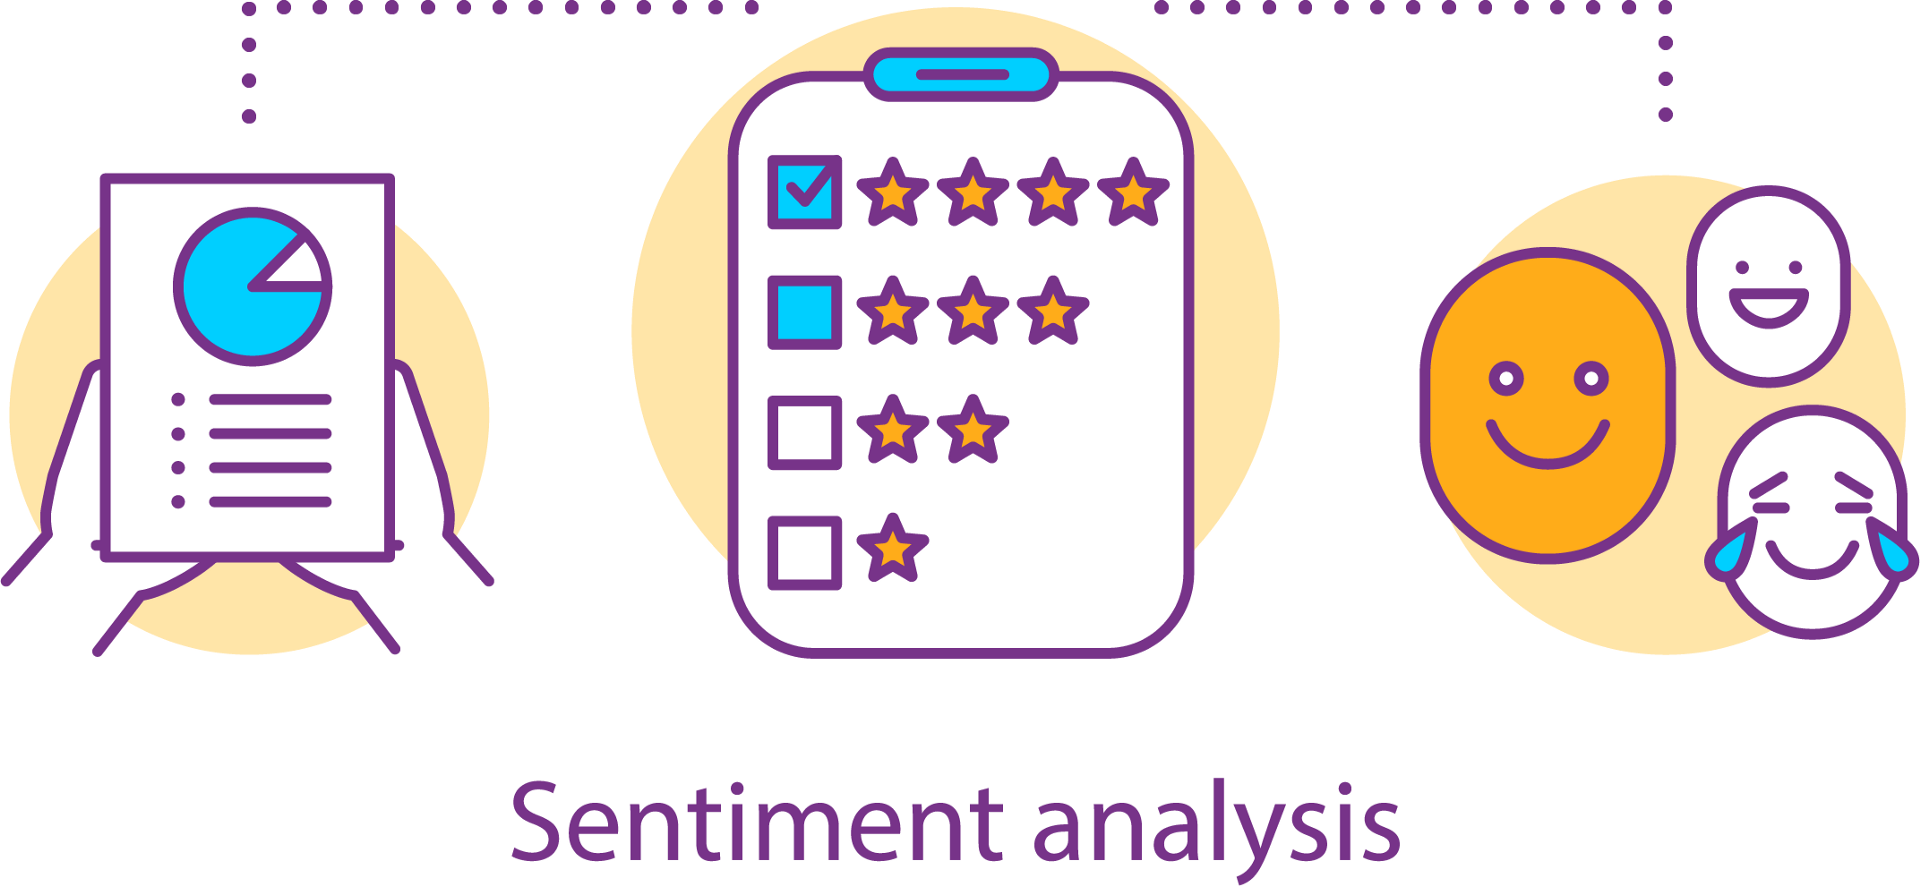

Natural language processing (**NLP**) is one of the most cumbersome areas of artificial intelligence when it comes to data preprocessing. Apart from the preprocessing and tokenizing text datasets, it takes a lot of time to train successful NLP models. 
### But today is your lucky day! We will build a sentiment classifier with a pre-trained NLP model: **BERT**.

##  Preliminary steps :
First , let's test the model  :


*Please run these cells, otherwise inference won't work.*

In [1]:
import tensorflow as tf
assert tf.__version__ >= "2.0"

In [2]:

from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("tblard/tf-allocine", use_fast=True)
model = TFAutoModelForSequenceClassification.from_pretrained("tblard/tf-allocine")

nlp = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

All model checkpoint layers were used when initializing TFCamembertForSequenceClassification.

All the layers of TFCamembertForSequenceClassification were initialized from the model checkpoint at tblard/tf-allocine.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertForSequenceClassification for predictions without further training.


## Inference

Here, you can enter your own sentences, and click on the "CLASSIFY!" button to feed BERT with your input. You can expand the text area by dragging the bottom right corner.



In [3]:
#@title
import ipywidgets as widgets
from IPython.display import display

class Color:   
   GREEN = '\033[92m'
   RED = '\033[91m'
   BOLD = '\033[1m'   
   END = '\033[0m'

button = widgets.Button(
    description='CLASSIFY !',
    button_style='success'
  )

text_area = widgets.Textarea(
    value='',
    placeholder='Type something',
    description='',
    disabled=False
)
output = widgets.Output()

def on_button_clicked(b):
    text = text_area.value
    result = nlp(text)
    prediction = result[0]["label"]

    if prediction == "POSITIVE":    
    color = Color.GREEN    
    else:
    color = Color.RED

    with output:    
    print(Color.BOLD + color + f'{prediction}: ' + Color.END + f'"{text[:50]}"')

button.on_click(on_button_clicked)
display(text_area, button, output)

Textarea(value='', placeholder='Type something')

Button(button_style='success', description='CLASSIFY !', style=ButtonStyle())

Output()

In [4]:
result = nlp("très mauvais opérateu")
prediction = result[0]["label"]
print ( prediction )


NEGATIVE



---
# Applying Sentiment_analysis to Orange data set : 



In [5]:
import pandas as pd
df = pd.read_excel ('OrangeFR.xlsx')

In [6]:
df

,Date,Titres,Contents
0,2021-03-31,arnaque,Mon père qui vient de décéder possédait une of...
1,2021-03-31,c'est trop long à expliqué tellement…,c'est trop long à expliqué tellement aucunes d...
2,2021-03-31,Le service client d'Orange est déplorable !,Le service client téléphonique d'Orange est dé...
3,2021-03-30,J'attend toujours ma carte sim depuis plus de ...,"J'ai dut changer de mobil suite à un vol, j'ai..."
4,2021-03-30,Orange c'est quoi la fibre ?,Orange c'est quoi la fibre ?Voila plusieurs mo...
...,...,...,...
3488,2011-03-08,saperlipopette!!!!,Beaucoup trop cher!!!
3489,2011-02-17,"Bon réseau, mauvais service clientèle",Déjà je veux dire qu'Orange ont un réseau supe...
3490,2010-08-05,Site pas tres clair,Il faut beaucoup naviguer avant d'aboutir à ce...
3491,2010-08-04,Bons & mauvais..,"de bons produits, mauvais service."


In [7]:
new_df=df.assign(Sentiment_Analysis="Value",Score=0)
new_df

,Date,Titres,Contents,Sentiment_Analysis,Score
0,2021-03-31,arnaque,Mon père qui vient de décéder possédait une of...,Value,0
1,2021-03-31,c'est trop long à expliqué tellement…,c'est trop long à expliqué tellement aucunes d...,Value,0
2,2021-03-31,Le service client d'Orange est déplorable !,Le service client téléphonique d'Orange est dé...,Value,0
3,2021-03-30,J'attend toujours ma carte sim depuis plus de ...,"J'ai dut changer de mobil suite à un vol, j'ai...",Value,0
4,2021-03-30,Orange c'est quoi la fibre ?,Orange c'est quoi la fibre ?Voila plusieurs mo...,Value,0
...,...,...,...,...,...
3488,2011-03-08,saperlipopette!!!!,Beaucoup trop cher!!!,Value,0
3489,2011-02-17,"Bon réseau, mauvais service clientèle",Déjà je veux dire qu'Orange ont un réseau supe...,Value,0
3490,2010-08-05,Site pas tres clair,Il faut beaucoup naviguer avant d'aboutir à ce...,Value,0
3491,2010-08-04,Bons & mauvais..,"de bons produits, mauvais service.",Value,0


In [8]:
for i in new_df.index: 
  result = nlp(new_df["Titres"][i])
  prediction = result[0]["label"]
  new_df["Sentiment_Analysis"][i]=prediction

<ipython-input-8-c2c150876c1b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Sentiment_Analysis"][i]=prediction


In [9]:
new_df

,Date,Titres,Contents,Sentiment_Analysis,Score
0,2021-03-31,arnaque,Mon père qui vient de décéder possédait une of...,NEGATIVE,0
1,2021-03-31,c'est trop long à expliqué tellement…,c'est trop long à expliqué tellement aucunes d...,NEGATIVE,0
2,2021-03-31,Le service client d'Orange est déplorable !,Le service client téléphonique d'Orange est dé...,NEGATIVE,0
3,2021-03-30,J'attend toujours ma carte sim depuis plus de ...,"J'ai dut changer de mobil suite à un vol, j'ai...",NEGATIVE,0
4,2021-03-30,Orange c'est quoi la fibre ?,Orange c'est quoi la fibre ?Voila plusieurs mo...,NEGATIVE,0
...,...,...,...,...,...
3488,2011-03-08,saperlipopette!!!!,Beaucoup trop cher!!!,NEGATIVE,0
3489,2011-02-17,"Bon réseau, mauvais service clientèle",Déjà je veux dire qu'Orange ont un réseau supe...,NEGATIVE,0
3490,2010-08-05,Site pas tres clair,Il faut beaucoup naviguer avant d'aboutir à ce...,NEGATIVE,0
3491,2010-08-04,Bons & mauvais..,"de bons produits, mauvais service.",NEGATIVE,0


In [10]:
for i in new_df.index:
  if new_df["Sentiment_Analysis"][i] == 'NEGATIVE':
    new_df["Score"][i]=-1
  elif new_df["Sentiment_Analysis"][i] == 'POSITIVE' :
    new_df["Score"][i]=1

<ipython-input-10-2997683d4126>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Score"][i]=-1
<ipython-input-10-2997683d4126>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Score"][i]=1


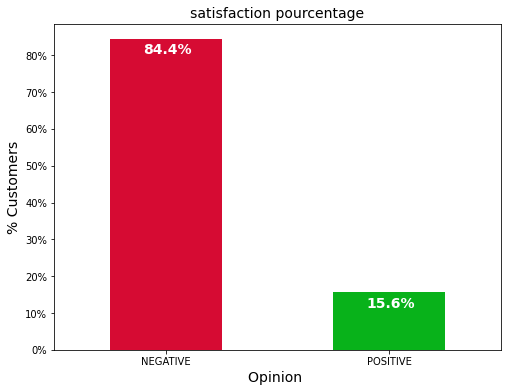

In [11]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
colors = ['#D60B33','#08B21A']
ax = (new_df['Sentiment_Analysis'].value_counts()*100.0 /len(new_df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Opinion ',size = 14)
ax.set_title('satisfaction pourcentage', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

# Applying Sentiment_analysis to Maps data set :



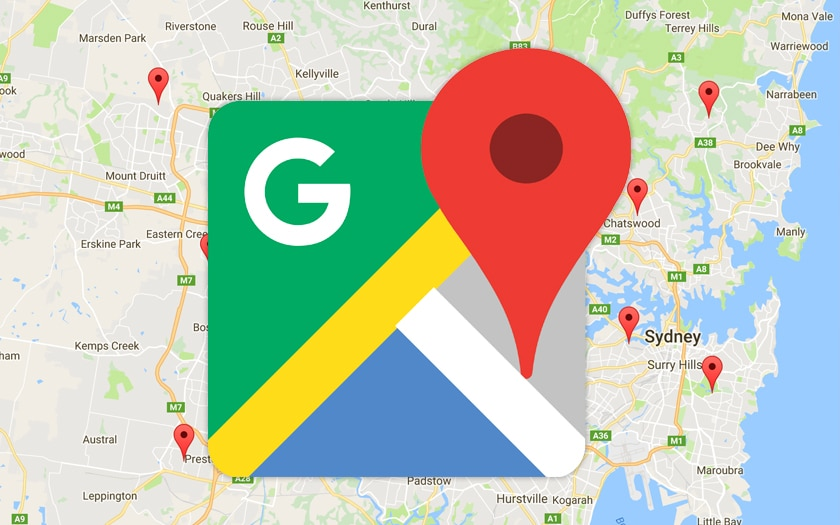

In [12]:
df_maps = pd.read_excel ('maps.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'maps.xlsx'

In [ ]:
df_maps

In [ ]:
df_maps=df_maps.dropna(axis=0, how='any')

In [ ]:
colsR=['section-review-text']
df_maps = df_maps.apply(lambda col: col.str.replace('(Traduit par Google)','') if col.name in colsR else col)

In [ ]:
df_maps=df_maps.assign(Sentiment_Analysis="Value")

In [ ]:
df_maps["region"].value_counts(dropna=True)

In [ ]:
df_maps

In [ ]:
for i in df_maps.index: 
  result = nlp(df_maps["section-review-text"][i])
  prediction = result[0]["label"]
  df_maps["Sentiment_Analysis"][i]=prediction

In [ ]:
df_maps

In [ ]:
df_regions = df_maps.set_index("region")
df_ariena=df_regions.loc["ariana"]

In [ ]:
df_ariena

In [ ]:
df_ariena["section-review-text"].astype(str)

In [ ]:
df_ariena["section-review-text"].value_counts()

In [ ]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
colors = ['#D60B33','#08B21A']
ax = (df_ariena['Sentiment_Analysis'].value_counts()*100.0 /len(df_ariena)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Opinion ',size = 14)
ax.set_title('satisfaction pourcentage', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

In [ ]:
df_regions = df_maps.set_index("region")
df_ben_arous=df_regions.loc["ben arous"]

In [ ]:
df_ben_arous

In [ ]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
colors = ['#D60B33','#08B21A']
ax = (df_ben_arous['Sentiment_Analysis'].value_counts()*100.0 /len(df_ben_arous)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Opinion ',size = 14)
ax.set_title('satisfaction pourcentage', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

In [ ]:
df_regions = df_maps.set_index("region")
df_tunis=df_regions.loc["tunis"]

In [ ]:
df_tunis

In [ ]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
colors = ['#D60B33','#08B21A']
ax = (df_tunis['Sentiment_Analysis'].value_counts()*100.0 /len(df_tunis)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Opinion ',size = 14)
ax.set_title('satisfaction pourcentage', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

In [ ]:
df_regions = df_maps.set_index("region")
df_sfax=df_regions.loc["sfax"]

In [ ]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
colors = ['#D60B33','#08B21A']
ax = (df_sfax['Sentiment_Analysis'].value_counts()*100.0 /len(df_sfax)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Opinion ',size = 14)
ax.set_title('satisfaction pourcentage', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

In [ ]:
df_regions = df_maps.set_index("region")
df_sousse=df_regions.loc["sousse"]

In [ ]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
colors = ['#D60B33','#08B21A']
ax = (df_sousse['Sentiment_Analysis'].value_counts()*100.0 /len(df_sousse)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Opinion ',size = 14)
ax.set_title('satisfaction pourcentage', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

In [ ]:
df_regions = df_maps.set_index("region")
df_monastir=df_regions.loc["monastir"]

In [ ]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
colors = ['#D60B33','#08B21A']
ax = (df_monastir['Sentiment_Analysis'].value_counts()*100.0 /len(df_monastir)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Opinion ',size = 14)
ax.set_title('Monastir satisfaction pourcentage ', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df_regions = df_maps.set_index("region")
df_beja=df_regions.loc["beja"]

In [ ]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
colors = ['#D60B33','#08B21A']
ax = (df_beja['Sentiment_Analysis'].value_counts()*100.0 /len(df_beja)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Opinion ',size = 14)
ax.set_title('satisfaction pourcentage', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

In [ ]:
df_regions = df_maps.set_index("region")
df_kairouan=df_regions.loc["kairouan"]

In [ ]:
df_kairouan

In [ ]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
colors = ['#D60B33','#08B21A']
ax = (df_kairouan['Sentiment_Analysis'].value_counts()*100.0 /len(df_kairouan)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Opinion ',size = 14)
ax.set_title('satisfaction pourcentage', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

In [1]:

import speech_recognition as sr
import os
tokenizer = AutoTokenizer.from_pretrained("tblard/tf-allocine", use_fast=True)
model = TFAutoModelForSequenceClassification.from_pretrained("tblard/tf-allocine")

nlp = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

wav=[]
directory = r'C:\Users\ASUS\MachineLearning\NLP\voicewav'
for filename in os.listdir(directory):
    if filename.endswith(".wav") :

        r = sr.Recognizer()
        with sr.AudioFile(os.path.join(directory, filename)) as source:
            r.energy_threshhold=10
            audio = r.record(source)
            try:
                text = r.recognize_google(audio,language="fr-FR")
                wav.append(text)
            except:
                print("Error")
    else:
        continue
        



NameError: name 'AutoTokenizer' is not defined

In [3]:
import speech_recognition as sr
import os
wav=[]
directory = r'C:\Users\ASUS\MachineLearning\NLP\voicewav'
for filename in os.listdir(directory):
    if filename.endswith(".wav") :

        r = sr.Recognizer()
        with sr.AudioFile(os.path.join(directory, filename)) as source:
            r.energy_threshhold=10
            audio = r.record(source)
            try:
                text = r.recognize_google(audio,language="fr-FR")
                wav.append(text)
            except:
                print("Error")
    else:
        continue
        
import pandas as pd
feedback=[]
pred=[]
for i in range(len(wav)):
    feedback.append(wav[i])
    pred.append(nlp(wav[i])[0]["label"])
dfSpeech=pd.DataFrame(zip(feedback,pred),columns=['feedback','pred'])
dfSpeech

,feedback,pred
0,c'est bien,POSITIVE
1,je suis content de ce service,POSITIVE
2,c'est nul,NEGATIVE
3,je suis triste,NEGATIVE
4,Serpentaire,NEGATIVE
5,je déteste ça fédérateur,NEGATIVE
6,oui c'est température de m'appeler,POSITIVE
7,température en 9 lettres,POSITIVE
8,c'est le meilleur des opérateurs,POSITIVE
9,je recommence mon opérateur à Mélanie,NEGATIVE


In [ ]:
!pip install Django==3.2.3

In [ ]:
dfSpeech.to_excel("speech.xlsx",index=False)

In [ ]:
import matplotlib.pyplot as plt
plt.pie(dfSpeech['pred'].value_counts(sort=False),autopct='%1.0f%%',labels=dfSpeech['pred'].unique())
plt.legend(bbox_to_anchor=[1.3, 1], loc='center right')
plt.show()
